# Week 02: Coordinate Systems & Straight Lines

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 2 of 12  
**Topics:** Cartesian Plane, Distance, Slope, Line Equations, Linear Regression  
**Last Updated:** November 15, 2025

---

## 📚 Learning Objectives

By the end of this notebook, you will be able to:

1. **Navigate** the Cartesian coordinate system and identify quadrants
2. **Calculate** distances between points using the distance formula
3. **Find** midpoints of line segments
4. **Compute** slopes and interpret rate of change
5. **Write** equations of lines in multiple forms (point-slope, slope-intercept, standard)
6. **Determine** if lines are parallel or perpendicular
7. **Perform** simple linear regression to fit data
8. **Visualize** lines, points, and relationships using Python
9. **Apply** coordinate geometry to real-world data science problems

---

## 🎯 Why This Matters for Data Science

- **Scatter Plots**: Every data visualization uses coordinate systems
- **Linear Regression**: Foundation of predictive modeling and machine learning
- **Distance Metrics**: KNN, K-Means, and clustering algorithms
- **Gradient Descent**: Optimization follows slopes (gradients)
- **Feature Relationships**: Understanding linear correlations
- **Data Transformations**: Scaling, normalization use coordinate concepts

---

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
import sklearn

# Set plotting style for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("=" * 70)
print("ENVIRONMENT SETUP - WEEK 2: COORDINATE GEOMETRY")
print("=" * 70)
print("\n✅ Libraries imported successfully!\n")
print("-" * 70)
print("AVAILABLE LIBRARIES & TOOLS")
print("-" * 70)
print(f"  📊 NumPy: {np.__version__:<15} → Numerical computations & arrays")
print(f"  📈 Matplotlib: {plt.matplotlib.__version__:<12} → Data visualizations & plots")
print(f"  📋 Pandas: {pd.__version__:<15} → Data manipulation & analysis")
print(f"  📐 SciPy: {scipy.__version__:<15} → Statistical functions")
print(f"  🤖 Scikit-learn: {sklearn.__version__:<10} → Machine learning algorithms")
print("-" * 70)
print("\n🚀 Ready to explore Coordinate Geometry and Straight Lines!")
print("=" * 70)

ENVIRONMENT SETUP - WEEK 2: COORDINATE GEOMETRY

✅ Libraries imported successfully!

----------------------------------------------------------------------
AVAILABLE LIBRARIES & TOOLS
----------------------------------------------------------------------
  📊 NumPy: 2.0.2           → Numerical computations & arrays
  📈 Matplotlib: 3.9.4        → Data visualizations & plots
  📋 Pandas: 2.3.3           → Data manipulation & analysis
  📐 SciPy: 1.13.1          → Statistical functions
  🤖 Scikit-learn: 1.6.1      → Machine learning algorithms
----------------------------------------------------------------------

🚀 Ready to explore Coordinate Geometry and Straight Lines!


## 1. The Cartesian Coordinate System

### 📖 Overview

The **Cartesian coordinate system** (named after René Descartes) provides a way to uniquely identify any point in 2D space using an ordered pair (x, y).

### 🎯 Components

| Component | Description | Examples |
|-----------|-------------|----------|
| **X-axis** | Horizontal line | Positive right, negative left |
| **Y-axis** | Vertical line | Positive up, negative down |
| **Origin (O)** | Point (0, 0) | Where axes intersect |
| **Ordered Pair** | (x, y) | x = horizontal, y = vertical |

### 📐 Four Quadrants

```
     Quadrant II        |        Quadrant I
      (-x, +y)          |          (+x, +y)
    -----------------(0,0)-------------------
      (-x, -y)          |          (+x, -y)
     Quadrant III       |        Quadrant IV
```

| Quadrant | Signs | Example |
|----------|-------|---------|
| **I** | (+, +) | (3, 4) |
| **II** | (−, +) | (−2, 5) |
| **III** | (−, −) | (−3, −2) |
| **IV** | (+, −) | (4, −3) |

### 🔑 Key Concepts

**Abscissa**: x-coordinate (horizontal distance from y-axis)  
**Ordinate**: y-coordinate (vertical distance from x-axis)  

**Special Points**:
- Points on **x-axis**: (x, 0)
- Points on **y-axis**: (0, y)
- **Origin**: (0, 0)

### 💡 Data Science Connection

Every data point in a scatter plot is represented as coordinates:
- **Feature vs Target**: x = feature value, y = target value
- **Time Series**: x = time, y = measurement
- **2D Clustering**: Each point = (feature₁, feature₂)

---

## 2. Visualizing the Coordinate System

Let's plot the Cartesian plane with quadrants and sample points!

CARTESIAN COORDINATE SYSTEM VISUALIZATION


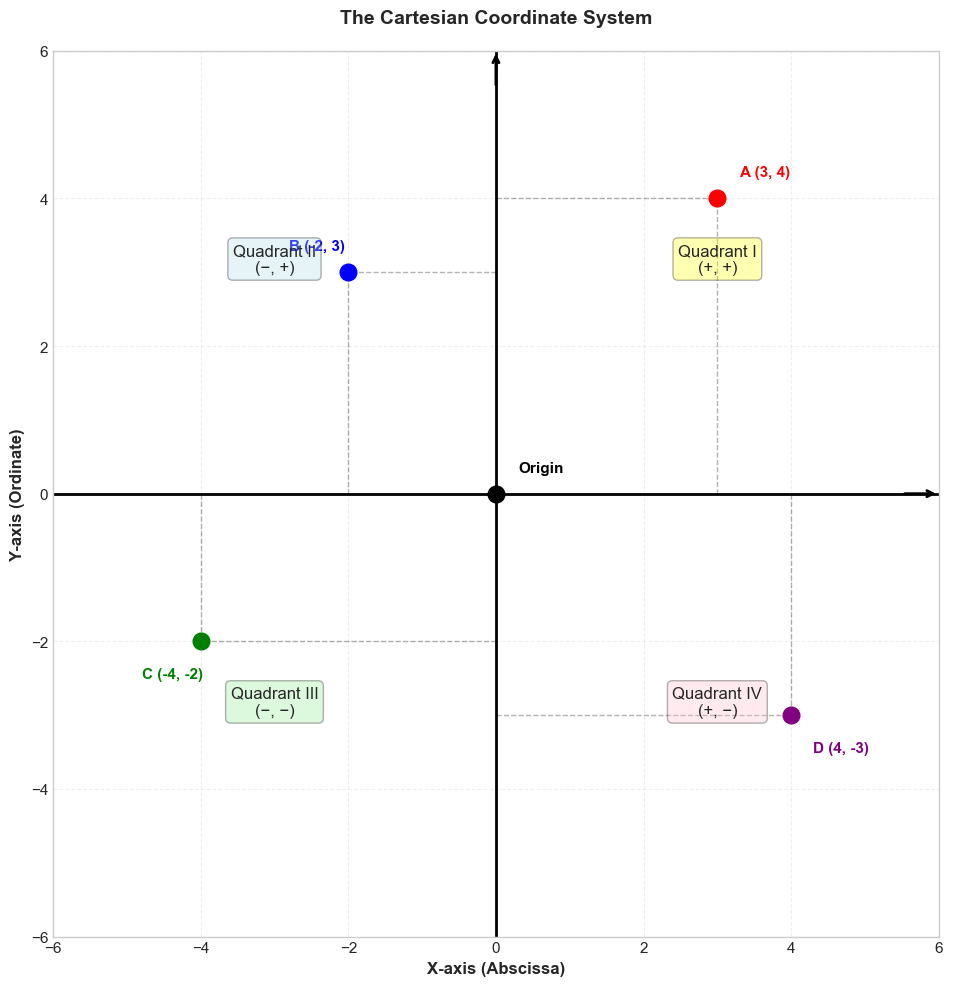


----------------------------------------------------------------------
POINT LOCATIONS IN COORDINATE SYSTEM
----------------------------------------------------------------------
  A (3, 4)        → (  3,   4) in Quadrant I
  B (-2, 3)       → ( -2,   3) in Quadrant II
  C (-4, -2)      → ( -4,  -2) in Quadrant III
  D (4, -3)       → (  4,  -3) in Quadrant IV
  Origin          → (  0,   0) in Origin
----------------------------------------------------------------------

✅ Cartesian plane visualization complete!
📁 Saved as: cartesian_plane.png


In [11]:
# Visualize the Cartesian Coordinate System

print("=" * 70)
print("CARTESIAN COORDINATE SYSTEM VISUALIZATION")
print("=" * 70)

fig, ax = plt.subplots(figsize=(10, 10))

# Draw axes
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

# Set limits
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# Sample points in each quadrant
points = {
    'A (3, 4)': (3, 4, 'Quadrant I'),
    'B (-2, 3)': (-2, 3, 'Quadrant II'),
    'C (-4, -2)': (-4, -2, 'Quadrant III'),
    'D (4, -3)': (4, -3, 'Quadrant IV'),
    'Origin': (0, 0, 'Origin')
}

colors = ['red', 'blue', 'green', 'purple', 'black']

for i, (label, (x, y, quad)) in enumerate(points.items()):
    ax.plot(x, y, 'o', color=colors[i], markersize=12, zorder=5)
    
    # Offset labels to avoid overlap
    offset_x = 0.3 if x >= 0 else -0.8
    offset_y = 0.3 if y >= 0 else -0.5
    
    ax.annotate(label, xy=(x, y), xytext=(x + offset_x, y + offset_y),
                fontsize=11, fontweight='bold', color=colors[i])
    
    # Draw dotted lines to axes (except origin)
    if label != 'Origin':
        ax.plot([x, x], [0, y], 'k--', alpha=0.3, linewidth=1)
        ax.plot([0, x], [y, y], 'k--', alpha=0.3, linewidth=1)

# Label quadrants
ax.text(3, 3, 'Quadrant I\n(+, +)', fontsize=12, ha='center', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax.text(-3, 3, 'Quadrant II\n(−, +)', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
ax.text(-3, -3, 'Quadrant III\n(−, −)', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax.text(3, -3, 'Quadrant IV\n(+, −)', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='pink', alpha=0.3))

# Axis labels
ax.set_xlabel('X-axis (Abscissa)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y-axis (Ordinate)', fontsize=12, fontweight='bold')
ax.set_title('The Cartesian Coordinate System', fontsize=14, fontweight='bold', pad=20)

# Add axis arrows
ax.annotate('', xy=(6, 0), xytext=(5.5, 0),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax.annotate('', xy=(0, 6), xytext=(0, 5.5),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

plt.tight_layout()
plt.savefig('cartesian_plane.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "-" * 70)
print("POINT LOCATIONS IN COORDINATE SYSTEM")
print("-" * 70)
for label, (x, y, quad) in points.items():
    print(f"  {label:15s} → ({x:>3}, {y:>3}) in {quad}")
print("-" * 70)
print("\n✅ Cartesian plane visualization complete!")
print("📁 Saved as: cartesian_plane.png")
print("=" * 70)

## 3. Distance Formula

### 📖 Theory

The **distance** between two points P₁(x₁, y₁) and P₂(x₂, y₂) is:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

### 🎯 Derivation (Pythagorean Theorem)

Consider a right triangle:
- **Horizontal leg**: |x₂ − x₁|
- **Vertical leg**: |y₂ − y₁|
- **Hypotenuse**: distance d

By Pythagorean theorem:
$$d^2 = (x_2 - x_1)^2 + (y_2 - y_1)^2$$

Taking square root:
$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

### 💡 Key Properties

1. **Always non-negative**: d ≥ 0
2. **Symmetric**: d(P₁, P₂) = d(P₂, P₁)
3. **Zero iff same point**: d = 0 ⟺ P₁ = P₂

### 🔬 Applications in Data Science

- **Euclidean Distance**: Most common distance metric
- **K-Nearest Neighbors**: Find k closest data points
- **K-Means Clustering**: Group by distance to centroids
- **Anomaly Detection**: Points far from clusters = outliers

---

DISTANCE FORMULA - EUCLIDEAN DISTANCE CALCULATIONS

----------------------------------------------------------------------
EXAMPLE 1: Classic 3-4-5 Pythagorean Triple
----------------------------------------------------------------------
  Point A: (2, 3)
  Point B: (5, 7)

  Calculation:
    d(A, B) = √[(x₂-x₁)² + (y₂-y₁)²]
            = √[(5-2)² + (7-3)²]
            = √[3² + 4²]
            = √[9 + 16]
            = √25
            = 5.0

  ✅ Result: Distance = 5.0 units
  🎯 This is the famous 3-4-5 Pythagorean triple!

----------------------------------------------------------------------
EXAMPLE 2: Distance from Origin
----------------------------------------------------------------------
  Origin: (0, 0)
  Point:  (3, 4)
  Distance from origin: 5.0 units
  ✅ Another 3-4-5 triangle!

----------------------------------------------------------------------
EXAMPLE 3: Distance Matrix for Multiple Points
----------------------------------------------------------------------
  Points: [

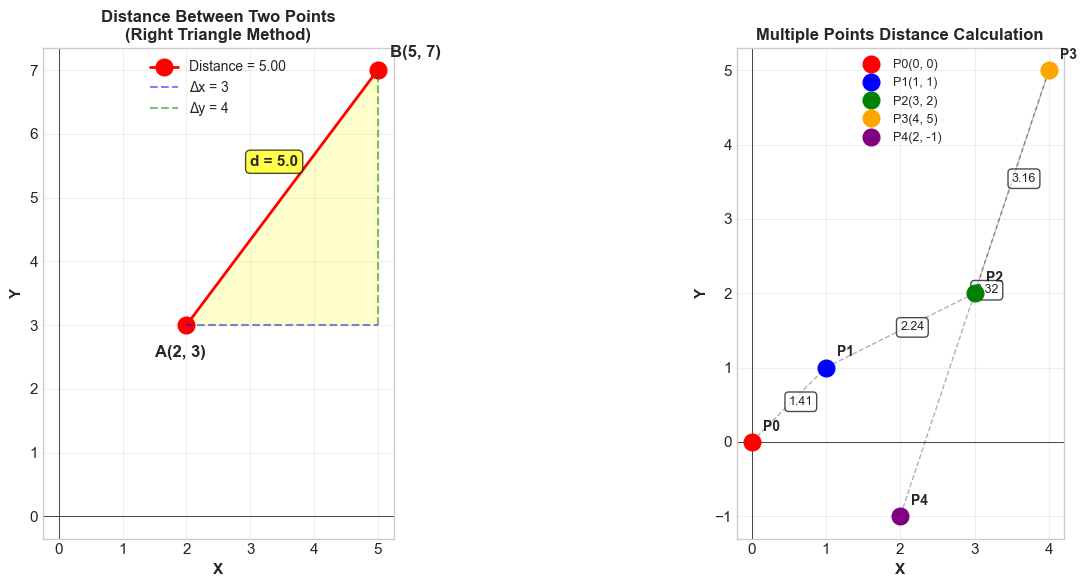


✅ Distance calculations complete!
📁 Visualization saved as: distance_formula.png


In [12]:
# Distance Formula Implementation

def distance(p1, p2):
    """
    Calculate Euclidean distance between two points.
    
    Formula: d = √[(x₂-x₁)² + (y₂-y₁)²]
    
    Args:
        p1: tuple (x1, y1) - First point coordinates
        p2: tuple (x2, y2) - Second point coordinates
    
    Returns:
        float: Euclidean distance between points
    """
    x1, y1 = p1
    x2, y2 = p2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

print("=" * 70)
print("DISTANCE FORMULA - EUCLIDEAN DISTANCE CALCULATIONS")
print("=" * 70)

# Example 1: Distance between A(2, 3) and B(5, 7)
A = (2, 3)
B = (5, 7)
d_AB = distance(A, B)

print("\n" + "-" * 70)
print("EXAMPLE 1: Classic 3-4-5 Pythagorean Triple")
print("-" * 70)
print(f"  Point A: {A}")
print(f"  Point B: {B}")
print(f"\n  Calculation:")
print(f"    d(A, B) = √[(x₂-x₁)² + (y₂-y₁)²]")
print(f"            = √[(5-2)² + (7-3)²]")
print(f"            = √[3² + 4²]")
print(f"            = √[9 + 16]")
print(f"            = √25")
print(f"            = {d_AB}")
print(f"\n  ✅ Result: Distance = {d_AB} units")
print(f"  🎯 This is the famous 3-4-5 Pythagorean triple!")

# Example 2: Distance from origin
origin = (0, 0)
point = (3, 4)
d_origin = distance(origin, point)

print("\n" + "-" * 70)
print("EXAMPLE 2: Distance from Origin")
print("-" * 70)
print(f"  Origin: {origin}")
print(f"  Point:  {point}")
print(f"  Distance from origin: {d_origin} units")
print(f"  ✅ Another 3-4-5 triangle!")

# Example 3: Multiple points distance matrix
points = [(0, 0), (1, 1), (3, 2), (4, 5), (2, -1)]

print("\n" + "-" * 70)
print("EXAMPLE 3: Distance Matrix for Multiple Points")
print("-" * 70)
print(f"  Points: {[f'P{i}{p}' for i, p in enumerate(points)]}")

# Create distance matrix
n = len(points)
dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dist_matrix[i, j] = distance(points[i], points[j])

# Display as DataFrame for better readability
df_dist = pd.DataFrame(dist_matrix, 
                       columns=[f"P{i}" for i in range(n)],
                       index=[f"P{i}" for i in range(n)])
print("\n  Distance Matrix (symmetric):")
print(df_dist.round(2))
print("\n  📊 Properties:")
print("    • Diagonal = 0 (distance to self)")
print("    • Symmetric: d(i,j) = d(j,i)")
print("    • All values ≥ 0")

# Visualize points and distances
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Points with distance line
ax = axes[0]
ax.plot(*zip(A, B), 'ro-', markersize=12, linewidth=2, label=f'Distance = {d_AB:.2f}')
ax.plot([A[0], B[0]], [A[1], A[1]], 'b--', alpha=0.5, linewidth=1.5, label='Δx = 3')
ax.plot([B[0], B[0]], [A[1], B[1]], 'g--', alpha=0.5, linewidth=1.5, label='Δy = 4')

# Right triangle visualization
triangle = plt.Polygon([A, (B[0], A[1]), B], alpha=0.2, color='yellow')
ax.add_patch(triangle)

ax.annotate(f'A{A}', xy=A, xytext=(A[0]-0.5, A[1]-0.5), fontsize=12, fontweight='bold')
ax.annotate(f'B{B}', xy=B, xytext=(B[0]+0.2, B[1]+0.2), fontsize=12, fontweight='bold')

# Add distance label on line
mid_x, mid_y = (A[0] + B[0])/2, (A[1] + B[1])/2
ax.annotate(f'd = {d_AB}', xy=(mid_x, mid_y), xytext=(mid_x-0.5, mid_y+0.5),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('X', fontsize=11, fontweight='bold')
ax.set_ylabel('Y', fontsize=11, fontweight='bold')
ax.set_title('Distance Between Two Points\n(Right Triangle Method)', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.set_aspect('equal')

# Right plot: Multiple points
ax = axes[1]
colors_list = ['red', 'blue', 'green', 'orange', 'purple']
for i, point in enumerate(points):
    ax.plot(point[0], point[1], 'o', markersize=12, color=colors_list[i], 
            label=f'P{i}{point}', zorder=5)
    ax.annotate(f'P{i}', xy=point, xytext=(point[0]+0.15, point[1]+0.15), 
                fontsize=10, fontweight='bold')

# Draw lines between consecutive points
for i in range(len(points)-1):
    ax.plot([points[i][0], points[i+1][0]], 
            [points[i][1], points[i+1][1]], 
            'k--', alpha=0.3, linewidth=1)
    
    # Add distance label
    mid_pt = ((points[i][0] + points[i+1][0])/2, (points[i][1] + points[i+1][1])/2)
    d = distance(points[i], points[i+1])
    ax.text(mid_pt[0], mid_pt[1], f'{d:.2f}', fontsize=9, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('X', fontsize=11, fontweight='bold')
ax.set_ylabel('Y', fontsize=11, fontweight='bold')
ax.set_title('Multiple Points Distance Calculation', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=9)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('distance_formula.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("✅ Distance calculations complete!")
print("📁 Visualization saved as: distance_formula.png")
print("=" * 70)

## 4. Midpoint Formula & Slope

### 📐 Midpoint Formula

The **midpoint** M of line segment P₁P₂ is:

$$M = \left(\frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2}\right)$$

**Interpretation**: Average of the coordinates  
**Geometric meaning**: Point exactly halfway between P₁ and P₂

### 📈 Slope Formula

The **slope** m of a line through P₁(x₁, y₁) and P₂(x₂, y₂) is:

$$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{\Delta y}{\Delta x} = \frac{\text{rise}}{\text{run}}$$

### 🎯 Types of Slopes

| Slope | Value | Direction | Example |
|-------|-------|-----------|---------|
| **Positive** | m > 0 | Rising ↗ | Upward trend |
| **Negative** | m < 0 | Falling ↘ | Downward trend |
| **Zero** | m = 0 | Horizontal → | Constant value |
| **Undefined** | Division by 0 | Vertical ↕ | x = constant |

### 💡 Slope Interpretation

- **m = 2**: For every 1 unit right, line rises 2 units
- **m = -½**: For every 1 unit right, line falls ½ unit
- **|m| > 1**: Steep line
- **|m| < 1**: Gentle line

### 🔬 Data Science Applications

**Slope represents**:
- **Rate of change**: How y changes with x
- **Correlation direction**: Positive/negative relationship
- **Gradient**: Direction of steepest ascent (optimization)
- **Coefficient**: In linear regression y = mx + b

---

MIDPOINT & SLOPE CALCULATIONS

----------------------------------------------------------------------
EXAMPLE 1: Midpoint and Slope Calculation
----------------------------------------------------------------------
  Point P₁: (-3, 4)
  Point P₂: (7, -2)

  Midpoint Calculation:
    M = ((x₁+x₂)/2, (y₁+y₂)/2)
      = ((-3+7)/2, (4+-2)/2)
      = (2.0, 1.0)
    ✅ Midpoint M = (2.0, 1.0)

  Slope Calculation:
    m = (y₂-y₁)/(x₂-x₁)
      = (-2-4)/(7--3)
      = -6/10
      = -0.60
    ✅ Slope m = -0.60
    📊 Interpretation: For every 1 unit right, line falls 0.60 units

----------------------------------------------------------------------
EXAMPLE 2: Different Types of Slopes
----------------------------------------------------------------------
  1. (1, 2) → (4, 8): m =       2.00  (Positive (rising ↗))
  2. (1, 8) → (4, 2): m =      -2.00  (Negative (falling ↘))
  3. (1, 3) → (5, 3): m =       0.00  (Zero (horizontal →))
  4. (3, 1) → (3, 5): m =  undefined  (Undefined (vertical ↕))


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3646593748.py:142: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3646593748.py:142: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3646593748.py:143: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('slope_types.png', dpi=150, bbox_inches='tight')
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3646593748.py:143: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('slope_types.png', dpi=150, bbox_inches='tight')
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_

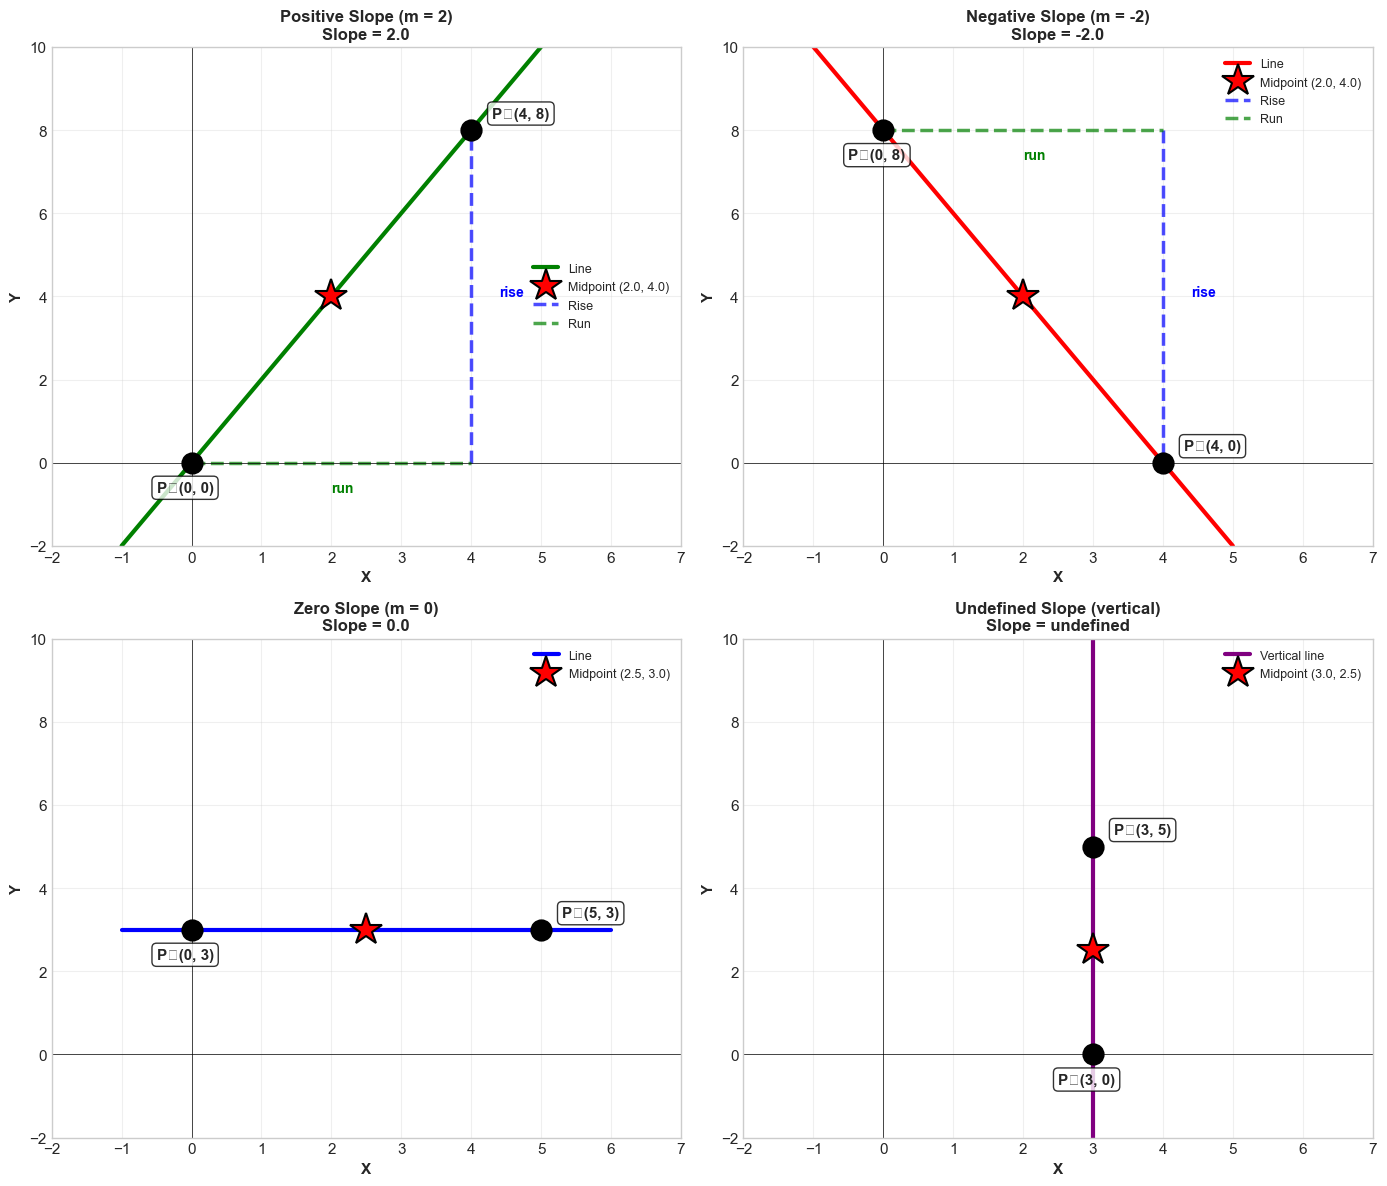


✅ Midpoint and slope calculations complete!
📁 Visualization saved as: slope_types.png

💡 KEY INSIGHTS:
  • Positive slope: Line rises from left to right
  • Negative slope: Line falls from left to right
  • Zero slope: Horizontal line (constant y-value)
  • Undefined slope: Vertical line (constant x-value)
  • Midpoint: Average of x-coordinates and y-coordinates


In [13]:
# Midpoint and Slope Calculations

def midpoint(p1, p2):
    """
    Calculate midpoint between two points.
    
    Formula: M = ((x₁+x₂)/2, (y₁+y₂)/2)
    
    Args:
        p1: tuple (x1, y1) - First point
        p2: tuple (x2, y2) - Second point
    
    Returns:
        tuple: Midpoint coordinates
    """
    return ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)

def slope(p1, p2):
    """
    Calculate slope between two points.
    
    Formula: m = (y₂-y₁)/(x₂-x₁) = rise/run
    
    Args:
        p1: tuple (x1, y1) - First point
        p2: tuple (x2, y2) - Second point
    
    Returns:
        float: Slope value (or inf for vertical lines)
    """
    if p2[0] == p1[0]:  # Vertical line
        return float('inf')
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

print("=" * 70)
print("MIDPOINT & SLOPE CALCULATIONS")
print("=" * 70)

# Example 1: Basic midpoint and slope
P1 = (-3, 4)
P2 = (7, -2)
M = midpoint(P1, P2)
m = slope(P1, P2)

print("\n" + "-" * 70)
print("EXAMPLE 1: Midpoint and Slope Calculation")
print("-" * 70)
print(f"  Point P₁: {P1}")
print(f"  Point P₂: {P2}")
print(f"\n  Midpoint Calculation:")
print(f"    M = ((x₁+x₂)/2, (y₁+y₂)/2)")
print(f"      = (({P1[0]}+{P2[0]})/2, ({P1[1]}+{P2[1]})/2)")
print(f"      = ({(P1[0]+P2[0])/2}, {(P1[1]+P2[1])/2})")
print(f"    ✅ Midpoint M = {M}")
print(f"\n  Slope Calculation:")
print(f"    m = (y₂-y₁)/(x₂-x₁)")
print(f"      = ({P2[1]}-{P1[1]})/({P2[0]}-{P1[0]})")
print(f"      = {P2[1]-P1[1]}/{P2[0]-P1[0]}")
print(f"      = {m:.2f}")
print(f"    ✅ Slope m = {m:.2f}")
print(f"    📊 Interpretation: For every 1 unit right, line falls {abs(m):.2f} units")

# Example 2: Different slope types
examples = [
    ((1, 2), (4, 8), "Positive (rising ↗)"),
    ((1, 8), (4, 2), "Negative (falling ↘)"),
    ((1, 3), (5, 3), "Zero (horizontal →)"),
    ((3, 1), (3, 5), "Undefined (vertical ↕)")
]

print("\n" + "-" * 70)
print("EXAMPLE 2: Different Types of Slopes")
print("-" * 70)
for i, (p1, p2, desc) in enumerate(examples, 1):
    m = slope(p1, p2)
    m_str = "undefined" if m == float('inf') else f"{m:.2f}"
    print(f"  {i}. {p1} → {p2}: m = {m_str:>10s}  ({desc})")

# Visualization: Different slopes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

slope_examples = [
    ((0, 0), (4, 8), "Positive Slope (m = 2)", 'green'),
    ((0, 8), (4, 0), "Negative Slope (m = -2)", 'red'),
    ((0, 3), (5, 3), "Zero Slope (m = 0)", 'blue'),
    ((3, 0), (3, 5), "Undefined Slope (vertical)", 'purple')
]

for idx, (p1, p2, title, color) in enumerate(slope_examples):
    ax = axes[idx]
    
    # Draw line
    if p1[0] != p2[0]:  # Not vertical
        x_vals = np.linspace(min(p1[0], p2[0])-1, max(p1[0], p2[0])+1, 100)
        m = slope(p1, p2)
        b = p1[1] - m * p1[0]
        y_vals = m * x_vals + b
        ax.plot(x_vals, y_vals, color=color, linewidth=3, label='Line')
    else:  # Vertical line
        ax.axvline(x=p1[0], color=color, linewidth=3, label='Vertical line')
    
    # Plot points
    ax.plot(*p1, 'ko', markersize=14, zorder=5, markeredgewidth=2)
    ax.plot(*p2, 'ko', markersize=14, zorder=5, markeredgewidth=2)
    
    # Calculate and plot midpoint
    M = midpoint(p1, p2)
    ax.plot(*M, 'r*', markersize=24, zorder=5, label=f'Midpoint {M}', markeredgecolor='black', markeredgewidth=1.5)
    
    # Annotations
    ax.annotate(f'P₁{p1}', xy=p1, xytext=(p1[0]-0.5, p1[1]-0.7), 
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.annotate(f'P₂{p2}', xy=p2, xytext=(p2[0]+0.3, p2[1]+0.3), 
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Show rise and run for non-vertical/horizontal
    if p1[0] != p2[0] and p1[1] != p2[1]:
        # Rise (vertical)
        ax.plot([p2[0], p2[0]], [p1[1], p2[1]], 'b--', linewidth=2.5, alpha=0.7, label='Rise')
        ax.text(p2[0]+0.4, (p1[1]+p2[1])/2, 'rise', fontsize=10, color='blue', fontweight='bold')
        
        # Run (horizontal)
        ax.plot([p1[0], p2[0]], [p1[1], p1[1]], 'g--', linewidth=2.5, alpha=0.7, label='Run')
        ax.text((p1[0]+p2[0])/2, p1[1]-0.7, 'run', fontsize=10, color='green', fontweight='bold')
    
    m_val = slope(p1, p2)
    m_text = "undefined" if m_val == float('inf') else f"{m_val:.1f}"
    
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel('X', fontsize=11, fontweight='bold')
    ax.set_ylabel('Y', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nSlope = {m_text}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.set_xlim(-2, 7)
    ax.set_ylim(-2, 10)

plt.tight_layout()
plt.savefig('slope_types.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("✅ Midpoint and slope calculations complete!")
print("📁 Visualization saved as: slope_types.png")
print("\n💡 KEY INSIGHTS:")
print("  • Positive slope: Line rises from left to right")
print("  • Negative slope: Line falls from left to right")
print("  • Zero slope: Horizontal line (constant y-value)")
print("  • Undefined slope: Vertical line (constant x-value)")
print("  • Midpoint: Average of x-coordinates and y-coordinates")
print("=" * 70)

## 5. Equations of Lines

### 📝 Multiple Forms, Same Line

A line can be expressed in various forms, each useful for different purposes:

### 1️⃣ **Point-Slope Form**

$$y - y_1 = m(x - x_1)$$

**Given**: Point (x₁, y₁) and slope m  
**Use when**: You know a point and slope  
**Example**: Line with slope 3 through (2, 5): y − 5 = 3(x − 2)

### 2️⃣ **Slope-Intercept Form** ⭐ (Most Common)

$$y = mx + b$$

**Given**: Slope m and y-intercept b  
**Use when**: Graphing, comparing lines, linear regression  
**Advantages**: 
- Immediately see slope and y-intercept
- Easy to plot
- Standard form in machine learning

**Example**: y = 2x + 3
- Slope = 2
- Y-intercept = 3
- Line crosses y-axis at (0, 3)

### 3️⃣ **Standard Form (General Form)**

$$Ax + By + C = 0$$

Where A, B, C are constants (A, B not both zero)

**Use when**: Solving systems of equations, mathematical proofs  
**Example**: 2x + 3y − 6 = 0

### 4️⃣ **Two-Point Form**

$$\frac{y - y_1}{y_2 - y_1} = \frac{x - x_1}{x_2 - x_1}$$

**Given**: Two points (x₁, y₁) and (x₂, y₂)  
**Use when**: You only know two points on the line

### 5️⃣ **Intercept Form**

$$\frac{x}{a} + \frac{y}{b} = 1$$

**Given**: x-intercept a and y-intercept b  
**Use when**: Both intercepts are known and non-zero

### 🎯 Converting Between Forms

**Point-Slope → Slope-Intercept**:
1. Start: y − y₁ = m(x − x₁)
2. Expand: y − y₁ = mx − mx₁
3. Solve for y: y = mx − mx₁ + y₁
4. Result: y = mx + b where b = y₁ − mx₁

**Standard → Slope-Intercept**:
1. Start: Ax + By + C = 0
2. Solve for y: By = −Ax − C
3. Result: y = −(A/B)x − (C/B)

---

📏 Line Representations

Example 1: Line from slope and y-intercept
  Slope-Intercept Form: y = 2x +3
  Point-Slope Form:     y - 5 = 2(x - 1)
  Standard Form:        -2x + 1y + -3 = 0

Example 2: Line from point (2, 5) and slope 3
  Slope-Intercept Form: y = 3x -1
  y at x=4: 11

Example 3: Line through points (1, 2) and (4, 8)
  Calculated slope: 2.0
  Slope-Intercept Form: y = 2.0x +0.0


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3534869667.py:173: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3534869667.py:173: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3534869667.py:174: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('line_equations.png', dpi=150, bbox_inches='tight')
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/3534869667.py:174: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('line_equations.png', dpi=150, bbox_inches='tight')


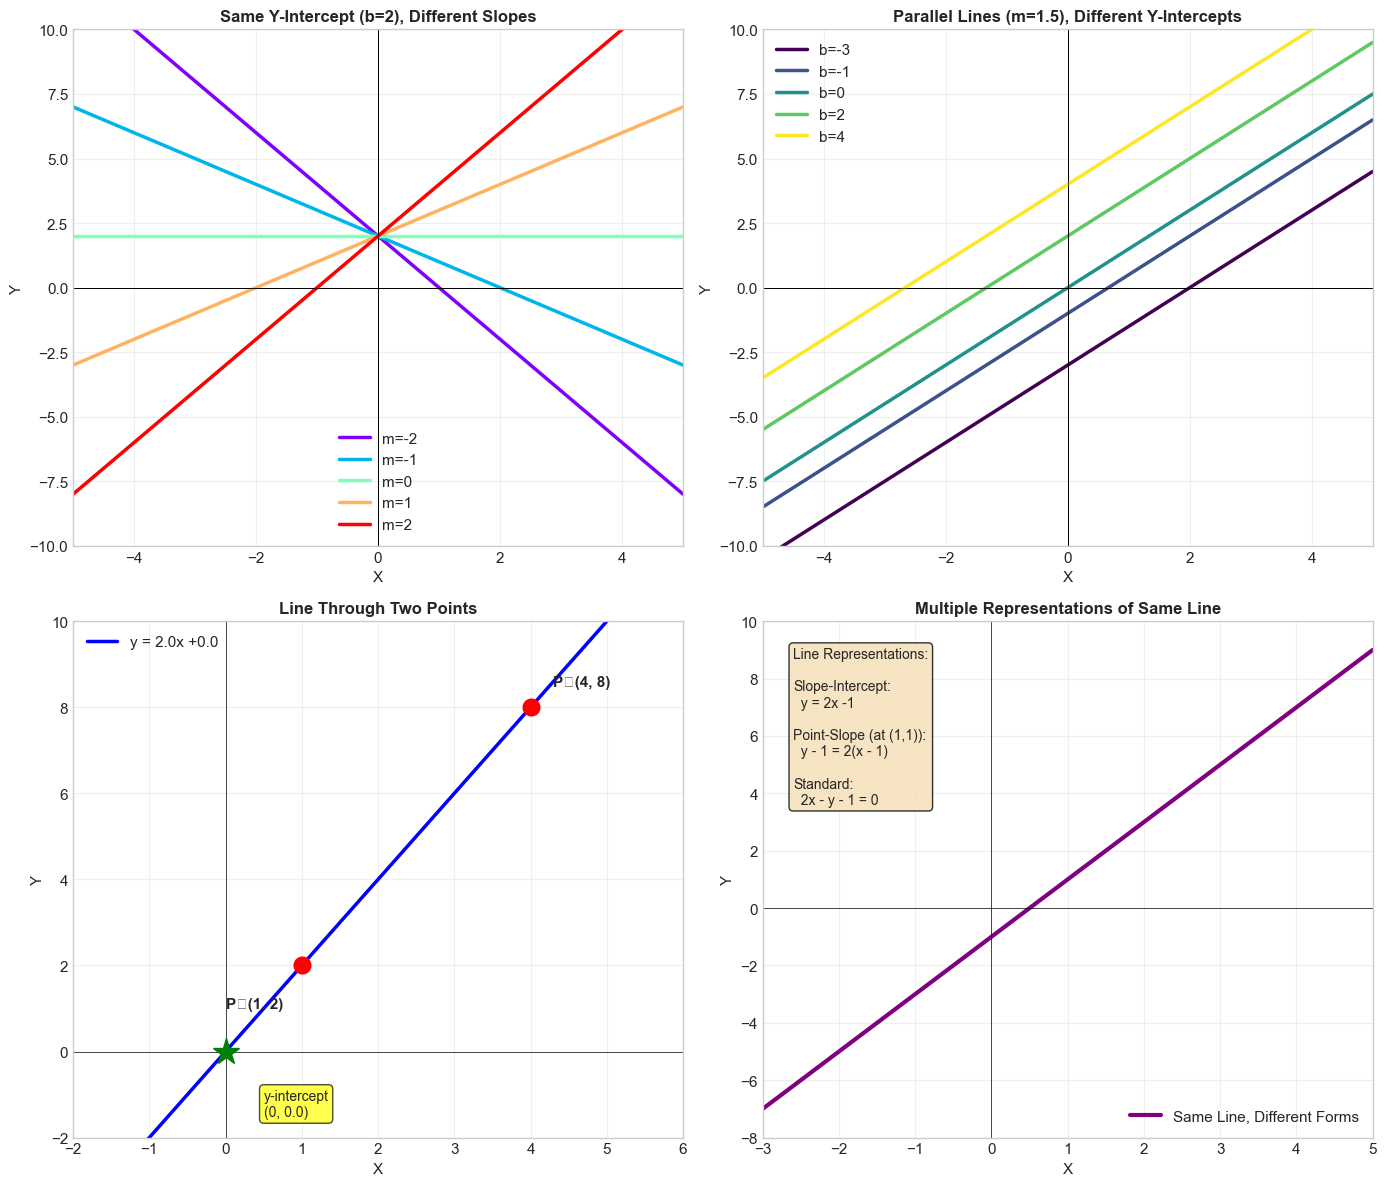


✓ Line equations and visualizations complete!


In [5]:
# Equations of Lines - Python Implementation

class Line:
    """Represents a line in 2D space with multiple form representations."""
    
    def __init__(self, slope=None, y_intercept=None, point=None, point2=None):
        """
        Initialize line from different representations.
        
        Args:
            slope: Slope m
            y_intercept: y-intercept b (for slope-intercept form)
            point: Single point (x, y) (requires slope)
            point2: Second point (for two-point form)
        """
        if slope is not None and y_intercept is not None:
            # Slope-intercept form: y = mx + b
            self.m = slope
            self.b = y_intercept
        elif slope is not None and point is not None:
            # Point-slope form: y - y1 = m(x - x1)
            self.m = slope
            self.b = point[1] - slope * point[0]
        elif point is not None and point2 is not None:
            # Two-point form
            if point2[0] == point[0]:
                raise ValueError("Vertical lines not supported in this class")
            self.m = (point2[1] - point[1]) / (point2[0] - point[0])
            self.b = point[1] - self.m * point[0]
        else:
            raise ValueError("Insufficient information to define line")
    
    def point_slope_form(self, point=None):
        """Return point-slope form string."""
        if point is None:
            point = (0, self.b)  # Use y-intercept point
        return f"y - {point[1]} = {self.m}(x - {point[0]})"
    
    def slope_intercept_form(self):
        """Return slope-intercept form string."""
        sign = '+' if self.b >= 0 else ''
        return f"y = {self.m}x {sign}{self.b}"
    
    def standard_form(self):
        """Return standard form string."""
        # y = mx + b  →  -mx + y - b = 0  →  mx - y + b = 0
        A, B, C = -self.m, 1, -self.b
        return f"{A}x + {B}y + {C} = 0"
    
    def evaluate(self, x):
        """Calculate y for given x."""
        return self.m * x + self.b
    
    def plot(self, x_range=(-5, 5), ax=None, **kwargs):
        """Plot the line."""
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 6))
        
        x_vals = np.linspace(x_range[0], x_range[1], 200)
        y_vals = self.m * x_vals + self.b
        
        ax.plot(x_vals, y_vals, **kwargs)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        
        return ax

# Example 1: Create line from slope and y-intercept
print("📏 Line Representations")
print("=" * 70)
print("\nExample 1: Line from slope and y-intercept")
line1 = Line(slope=2, y_intercept=3)
print(f"  Slope-Intercept Form: {line1.slope_intercept_form()}")
print(f"  Point-Slope Form:     {line1.point_slope_form((1, 5))}")
print(f"  Standard Form:        {line1.standard_form()}")

# Example 2: Line from point and slope
print("\nExample 2: Line from point (2, 5) and slope 3")
line2 = Line(slope=3, point=(2, 5))
print(f"  Slope-Intercept Form: {line2.slope_intercept_form()}")
print(f"  y at x=4: {line2.evaluate(4)}")

# Example 3: Line from two points
print("\nExample 3: Line through points (1, 2) and (4, 8)")
line3 = Line(point=(1, 2), point2=(4, 8))
print(f"  Calculated slope: {line3.m}")
print(f"  Slope-Intercept Form: {line3.slope_intercept_form()}")

# Visualize different forms
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Multiple lines with different slopes, same y-intercept
ax = axes[0, 0]
slopes = [-2, -1, 0, 1, 2]
colors = plt.cm.rainbow(np.linspace(0, 1, len(slopes)))

for m, color in zip(slopes, colors):
    line = Line(slope=m, y_intercept=2)
    line.plot(ax=ax, color=color, linewidth=2.5, label=f'm={m}')

ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Same Y-Intercept (b=2), Different Slopes', fontsize=12, fontweight='bold')
ax.legend()
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)

# Plot 2: Same slope, different y-intercepts (parallel lines)
ax = axes[0, 1]
intercepts = [-3, -1, 0, 2, 4]
colors = plt.cm.viridis(np.linspace(0, 1, len(intercepts)))

for b, color in zip(intercepts, colors):
    line = Line(slope=1.5, y_intercept=b)
    line.plot(ax=ax, color=color, linewidth=2.5, label=f'b={b}')

ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Parallel Lines (m=1.5), Different Y-Intercepts', fontsize=12, fontweight='bold')
ax.legend()
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)

# Plot 3: Line from two points with annotations
ax = axes[1, 0]
p1, p2 = (1, 2), (4, 8)
line = Line(point=p1, point2=p2)
line.plot(ax=ax, color='blue', linewidth=2.5, label=line.slope_intercept_form())

ax.plot(*p1, 'ro', markersize=12, zorder=5)
ax.plot(*p2, 'ro', markersize=12, zorder=5)
ax.annotate(f'P₁{p1}', xy=p1, xytext=(p1[0]-1, p1[1]-1), fontsize=11, fontweight='bold')
ax.annotate(f'P₂{p2}', xy=p2, xytext=(p2[0]+0.3, p2[1]+0.5), fontsize=11, fontweight='bold')

# Show y-intercept
y_int = (0, line.b)
ax.plot(*y_int, 'g*', markersize=20, zorder=5)
ax.annotate(f'y-intercept\n(0, {line.b})', xy=y_int, xytext=(0.5, line.b-1.5), 
            fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Line Through Two Points', fontsize=12, fontweight='bold')
ax.legend()
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 10)

# Plot 4: Converting between forms
ax = axes[1, 1]
line = Line(slope=2, y_intercept=-1)
line.plot(ax=ax, color='purple', linewidth=3, label='Same Line, Different Forms')

# Add text box with all forms
forms_text = (
    "Line Representations:\n\n"
    f"Slope-Intercept:\n  {line.slope_intercept_form()}\n\n"
    f"Point-Slope (at (1,1)):\n  y - 1 = 2(x - 1)\n\n"
    f"Standard:\n  2x - y - 1 = 0"
)

ax.text(0.05, 0.95, forms_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Multiple Representations of Same Line', fontsize=12, fontweight='bold')
ax.legend(loc='lower right')
ax.set_xlim(-3, 5)
ax.set_ylim(-8, 10)

plt.tight_layout()
plt.savefig('line_equations.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Line equations and visualizations complete!")

## 6. Parallel & Perpendicular Lines

### 🔀 Parallel Lines

Two non-vertical lines are **parallel** if and only if:

$$m_1 = m_2$$

**Properties**:
- Same slope, different y-intercepts
- Never intersect (maintain constant distance)
- Same "steepness" and direction

**Example**: 
- L₁: y = 3x + 2
- L₂: y = 3x − 5
- Both have slope 3 → Parallel ✓

### ⟂ Perpendicular Lines

Two non-vertical lines are **perpendicular** if and only if:

$$m_1 \cdot m_2 = -1 \quad \text{or} \quad m_2 = -\frac{1}{m_1}$$

**Properties**:
- Slopes are **negative reciprocals**
- Intersect at 90° angle
- Product of slopes = -1

**Example**:
- L₁: y = 2x + 1 (slope = 2)
- L₂: y = -½x + 3 (slope = -½)
- Check: 2 × (-½) = -1 ✓ → Perpendicular!

### 🎯 Special Cases

| Line Type | Slope | Perpendicular To | Example |
|-----------|-------|------------------|---------|
| Horizontal | m = 0 | Vertical (undefined) | y = 3 |
| Vertical | undefined | Horizontal (m = 0) | x = 2 |

### 💡 Quick Reference Table

| Original Slope | Parallel Slope | Perpendicular Slope |
|----------------|----------------|---------------------|
| 2 | 2 | -½ |
| -3 | -3 | ⅓ |
| ½ | ½ | -2 |
| -¾ | -¾ | 4/3 |
| 0 (horizontal) | 0 | undefined (vertical) |

### 🔬 Applications

**Parallel Lines**:
- Growth trends with different starting points
- Multiple regression: comparing slopes
- Shifted transformations

**Perpendicular Lines**:
- Gradient descent (perpendicular to contour lines)
- Principal Component Analysis (orthogonal components)
- Perpendicular bisectors (equidistant points)

---

📐 Parallel & Perpendicular Lines

Example 1: Parallel Lines
  Line 1: y = 2x + 3
  Line 2: y = 2x - 5
  Parallel? True
  Slopes: 2 and 2 (equal) ✓

Example 2: Perpendicular Lines
  Line 1: y = 2x + 1
  Line 2: y = -0.5x + 3
  Perpendicular? True
  Product of slopes: 2 × -0.5 = -1.0 (equals -1) ✓

Example 3: Finding Perpendicular Line
  Given: Line y = 3x + 2 through point (1, 4)
  Original slope: 3
  Perpendicular slope: -0.3333333333333333
  Perpendicular line: y = -0.3333333333333333x + 4.33


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/155893268.py:111: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/155893268.py:111: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/155893268.py:111: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/155893268.py:112: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('parallel_perpendicular.png', dpi=150, bbox_inches='tight')
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_51996/155893268.py:112: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('parallel_perpendicular.png', dpi=150, bbox_inches='tight')
/var/folders/0f/

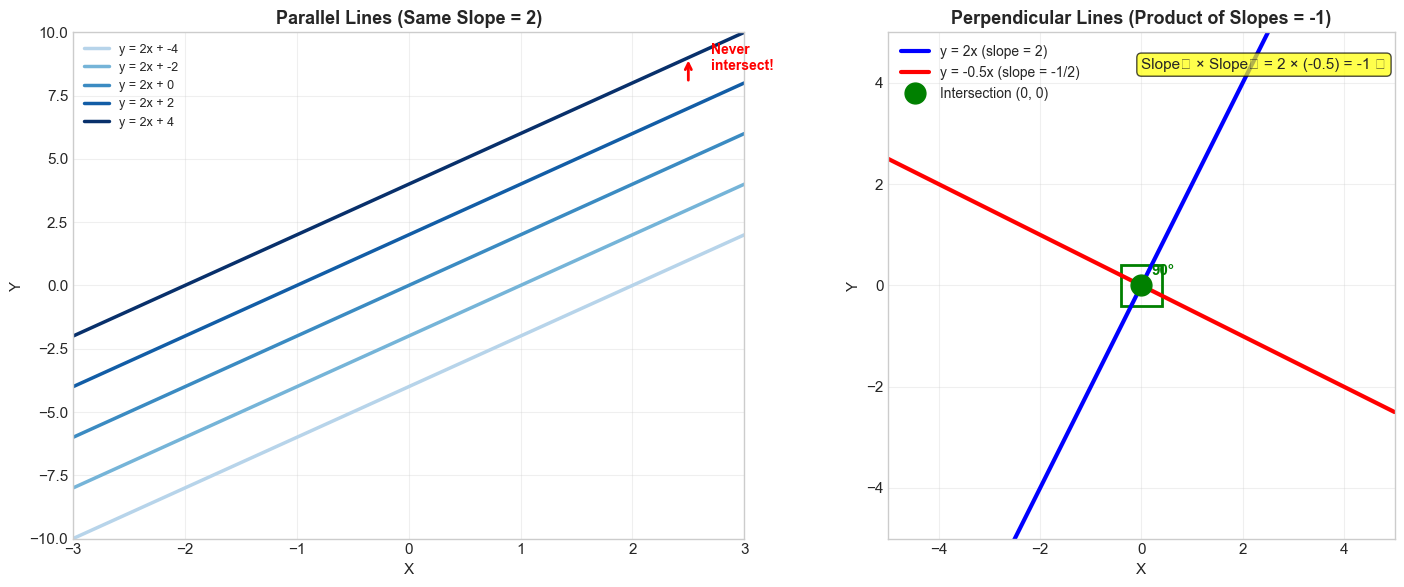


📝 Practice: Finding Line Equations
----------------------------------------------------------------------

Problem 1: Parallel line through (1, 5) to y = 3x + 2
  Solution: y = 3x + 2

Problem 2: Perpendicular line through (4, 3) to y = 2x + 1
  Solution: y = -0.5x + 5.0

✓ Parallel and perpendicular lines complete!


In [6]:
# Parallel and Perpendicular Lines

def are_parallel(m1, m2, tolerance=1e-10):
    """Check if two lines are parallel."""
    return abs(m1 - m2) < tolerance

def are_perpendicular(m1, m2, tolerance=1e-10):
    """Check if two lines are perpendicular."""
    return abs(m1 * m2 + 1) < tolerance

def perpendicular_slope(m):
    """Return perpendicular slope."""
    if m == 0:
        return float('inf')
    return -1 / m

print("📐 Parallel & Perpendicular Lines")
print("=" * 70)

# Example 1: Parallel lines
print("\nExample 1: Parallel Lines")
m1, m2 = 2, 2
print(f"  Line 1: y = {m1}x + 3")
print(f"  Line 2: y = {m2}x - 5")
print(f"  Parallel? {are_parallel(m1, m2)}")
print(f"  Slopes: {m1} and {m2} (equal) ✓")

# Example 2: Perpendicular lines
print("\nExample 2: Perpendicular Lines")
m1, m2 = 2, -0.5
print(f"  Line 1: y = {m1}x + 1")
print(f"  Line 2: y = {m2}x + 3")
print(f"  Perpendicular? {are_perpendicular(m1, m2)}")
print(f"  Product of slopes: {m1} × {m2} = {m1*m2} (equals -1) ✓")

# Example 3: Finding perpendicular line
print("\nExample 3: Finding Perpendicular Line")
print("  Given: Line y = 3x + 2 through point (1, 4)")
m_original = 3
m_perp = perpendicular_slope(m_original)
b_perp = 4 - m_perp * 1  # Using point (1, 4)
print(f"  Original slope: {m_original}")
print(f"  Perpendicular slope: {m_perp}")
print(f"  Perpendicular line: y = {m_perp}x + {b_perp:.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Parallel Lines
ax = axes[0]
x = np.linspace(-3, 3, 100)

# Multiple parallel lines with slope 2
intercepts = [-4, -2, 0, 2, 4]
colors = plt.cm.Blues(np.linspace(0.3, 1, len(intercepts)))

for b, color in zip(intercepts, colors):
    y = 2 * x + b
    ax.plot(x, y, color=color, linewidth=2.5, label=f'y = 2x + {b}')

# Add arrows to show they never meet
ax.annotate('', xy=(2.5, 9), xytext=(2.5, 8),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax.text(2.7, 8.5, 'Never\nintersect!', fontsize=10, color='red', fontweight='bold')

ax.grid(True, alpha=0.3)
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Parallel Lines (Same Slope = 2)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9)
ax.set_xlim(-3, 3)
ax.set_ylim(-10, 10)

# Plot 2: Perpendicular Lines
ax = axes[1]
x = np.linspace(-5, 5, 100)

# Original line with slope 2
y1 = 2 * x + 0
ax.plot(x, y1, 'b-', linewidth=3, label='y = 2x (slope = 2)')

# Perpendicular line with slope -1/2
y2 = -0.5 * x + 0
ax.plot(x, y2, 'r-', linewidth=3, label='y = -0.5x (slope = -1/2)')

# Mark intersection point
ax.plot(0, 0, 'go', markersize=15, zorder=5, label='Intersection (0, 0)')

# Draw right angle indicator
square_size = 0.8
square = plt.Rectangle((-square_size/2, -square_size/2), square_size, square_size,
                       fill=False, edgecolor='green', linewidth=2)
ax.add_patch(square)
ax.text(0.2, 0.2, '90°', fontsize=11, color='green', fontweight='bold')

# Show slope product
ax.text(0.5, 0.95, f'Slope₁ × Slope₂ = 2 × (-0.5) = -1 ✓',
        transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
        verticalalignment='top')

ax.grid(True, alpha=0.3)
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_title('Perpendicular Lines (Product of Slopes = -1)', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('parallel_perpendicular.png', dpi=150, bbox_inches='tight')
plt.show()

# Additional example: Finding equations
print("\n📝 Practice: Finding Line Equations")
print("-" * 70)

# Problem: Find equation parallel to y = 3x + 2 through (1, 5)
print("\nProblem 1: Parallel line through (1, 5) to y = 3x + 2")
m_parallel = 3  # Same slope
b_parallel = 5 - 3 * 1  # y - mx using point (1, 5)
print(f"  Solution: y = {m_parallel}x + {b_parallel}")

# Problem: Find equation perpendicular to y = 2x + 1 through (4, 3)
print("\nProblem 2: Perpendicular line through (4, 3) to y = 2x + 1")
m_perp = -1/2  # Negative reciprocal
b_perp = 3 - m_perp * 4
print(f"  Solution: y = {m_perp}x + {b_perp}")

print("\n✓ Parallel and perpendicular lines complete!")

## 7. Linear Regression: Fitting a Line to Data

### 🎯 The Problem

Given data points (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ), find the "best-fit" line:

$$\hat{y} = mx + b$$

### 📊 Method: Least Squares

**Goal**: Minimize the sum of squared vertical distances (errors)

$$\text{Minimize: } SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - mx_i - b)^2$$

### 📐 Formulas (Derived from Calculus)

**Slope**:
$$m = \frac{n\sum xy - (\sum x)(\sum y)}{n\sum x^2 - (\sum x)^2}$$

**Y-Intercept**:
$$b = \frac{\sum y - m \sum x}{n} = \bar{y} - m\bar{x}$$

Where:
- n = number of data points
- x̄ = mean of x values
- ȳ = mean of y values

### 📈 Key Metrics

**Coefficient of Determination (R²)**:
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

- **R² = 1**: Perfect fit (all points on line)
- **R² = 0**: No linear relationship
- **R² > 0.7**: Strong linear relationship

### 💡 Interpretation

- **Slope (m)**: Change in y for unit change in x
- **Intercept (b)**: Value of y when x = 0
- **Residual**: Vertical distance from point to line

### 🔬 Why This Matters

Linear regression is:
- **Foundation of machine learning**: Simplest predictive model
- **Feature relationships**: Understanding correlations
- **Trend analysis**: Identifying patterns in data
- **Baseline model**: Compare against complex models

---

📈 Linear Regression: Finding Best-Fit Line

Example 1: House Size vs Price
Data points:
  (10, 150)
  (15, 200)
  (20, 250)
  (25, 300)
  (30, 350)
  (35, 400)

Regression Results:
  Equation: ŷ = 10.00x + 50.00
  Slope (m) = 10.00 ($10000 per 100 sq ft)
  Intercept (b) = 50.00 ($50000 base price)
  R² = 1.0000 (100.00% variance explained)

Predictions:
  Size 1200 sq ft → $170.00k ($170000)
  Size 2200 sq ft → $270.00k ($270000)
  Size 3200 sq ft → $370.00k ($370000)


Example 2: Study Hours vs Test Score

Regression Results:
  Equation: ŷ = 7.36x + 56.13
  Interpretation: Each hour of study adds ~7.4 points
  R² = 0.9625

Verification with sklearn:
  Slope: 7.36 (matches our 7.36 ✓)
  Intercept: 56.13 (matches our 56.13 ✓)


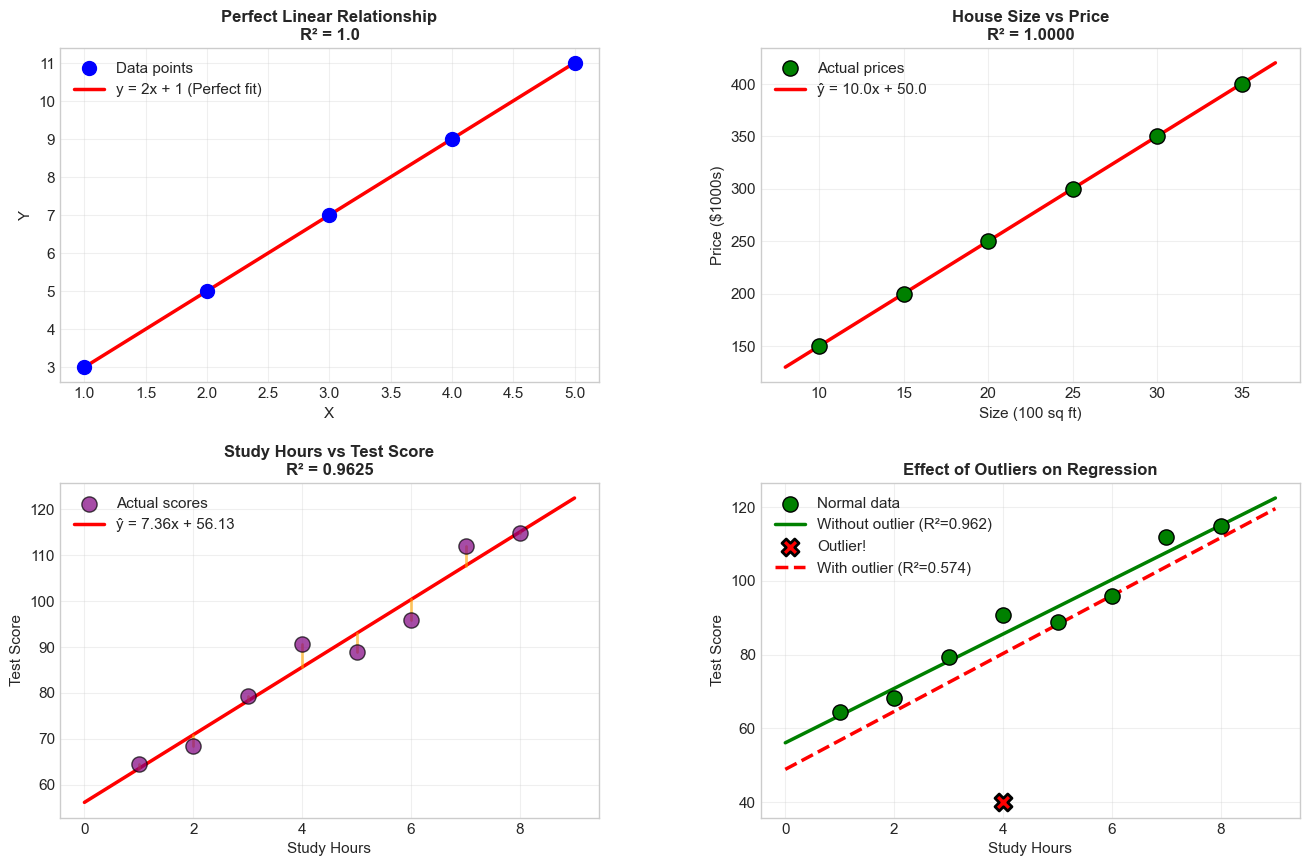


✓ Linear regression analysis complete!

💡 Key Insights:
  • Least squares finds line that minimizes vertical distances
  • R² measures goodness of fit (closer to 1 is better)
  • Outliers can significantly affect the regression line
  • Residuals show prediction errors for each point


In [7]:
# Linear Regression Implementation

def linear_regression_manual(x, y):
    """
    Calculate linear regression coefficients manually using formulas.
    
    Args:
        x: array of x values
        y: array of y values
    
    Returns:
        tuple: (slope, intercept, r_squared)
    """
    n = len(x)
    
    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)
    sum_y2 = np.sum(y**2)
    
    # Calculate slope
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    
    # Calculate intercept
    b = (sum_y - m * sum_x) / n
    
    # Calculate R²
    y_pred = m * x + b
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return m, b, r_squared

print("📈 Linear Regression: Finding Best-Fit Line")
print("=" * 70)

# Example 1: Simple dataset
print("\nExample 1: House Size vs Price")
# Size in 100 sq ft, Price in $1000s
size = np.array([10, 15, 20, 25, 30, 35])
price = np.array([150, 200, 250, 300, 350, 400])

m, b, r2 = linear_regression_manual(size, price)

print(f"Data points:")
for s, p in zip(size, price):
    print(f"  ({s}, {p})")

print(f"\nRegression Results:")
print(f"  Equation: ŷ = {m:.2f}x + {b:.2f}")
print(f"  Slope (m) = {m:.2f} (${m*1000:.0f} per 100 sq ft)")
print(f"  Intercept (b) = {b:.2f} (${b*1000:.0f} base price)")
print(f"  R² = {r2:.4f} ({r2*100:.2f}% variance explained)")

# Predictions
test_sizes = [12, 22, 32]
print(f"\nPredictions:")
for s in test_sizes:
    pred_price = m * s + b
    print(f"  Size {s}00 sq ft → ${pred_price:.2f}k (${pred_price*1000:.0f})")

# Example 2: Data with scatter
print("\n" + "=" * 70)
print("\nExample 2: Study Hours vs Test Score")

np.random.seed(42)
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8])
test_score = 55 + 7 * study_hours + np.random.normal(0, 5, len(study_hours))

m2, b2, r2_2 = linear_regression_manual(study_hours, test_score)

print(f"\nRegression Results:")
print(f"  Equation: ŷ = {m2:.2f}x + {b2:.2f}")
print(f"  Interpretation: Each hour of study adds ~{m2:.1f} points")
print(f"  R² = {r2_2:.4f}")

# Compare with sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(study_hours.reshape(-1, 1), test_score)

print(f"\nVerification with sklearn:")
print(f"  Slope: {model.coef_[0]:.2f} (matches our {m2:.2f} ✓)")
print(f"  Intercept: {model.intercept_:.2f} (matches our {b2:.2f} ✓)")

# Comprehensive Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Perfect Linear Relationship
ax1 = fig.add_subplot(gs[0, 0])
x1 = np.array([1, 2, 3, 4, 5])
y1 = 2 * x1 + 1

ax1.scatter(x1, y1, s=100, c='blue', zorder=5, label='Data points')
ax1.plot(x1, y1, 'r-', linewidth=2.5, label='y = 2x + 1 (Perfect fit)')

# Show residuals (all zero)
for xi, yi in zip(x1, y1):
    ax1.plot([xi, xi], [yi, yi], 'g--', linewidth=1.5, alpha=0.5)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_title('Perfect Linear Relationship\nR² = 1.0', fontsize=12, fontweight='bold')
ax1.legend()

# Plot 2: House Size vs Price
ax2 = fig.add_subplot(gs[0, 1])

ax2.scatter(size, price, s=120, c='green', zorder=5, label='Actual prices', edgecolors='black')
x_line = np.linspace(size.min() - 2, size.max() + 2, 100)
y_line = m * x_line + b
ax2.plot(x_line, y_line, 'r-', linewidth=2.5, label=f'ŷ = {m:.1f}x + {b:.1f}')

# Show residuals
y_pred = m * size + b
for xi, yi, yp in zip(size, price, y_pred):
    ax2.plot([xi, xi], [yi, yp], 'b--', linewidth=1.5, alpha=0.5)
    
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Size (100 sq ft)', fontsize=11)
ax2.set_ylabel('Price ($1000s)', fontsize=11)
ax2.set_title(f'House Size vs Price\nR² = {r2:.4f}', fontsize=12, fontweight='bold')
ax2.legend()

# Plot 3: Study Hours vs Score (with scatter)
ax3 = fig.add_subplot(gs[1, 0])

ax3.scatter(study_hours, test_score, s=120, c='purple', zorder=5, 
           label='Actual scores', edgecolors='black', alpha=0.7)
x_line = np.linspace(0, 9, 100)
y_line = m2 * x_line + b2
ax3.plot(x_line, y_line, 'r-', linewidth=2.5, label=f'ŷ = {m2:.2f}x + {b2:.2f}')

# Show residuals
y_pred2 = m2 * study_hours + b2
for xi, yi, yp in zip(study_hours, test_score, y_pred2):
    ax3.plot([xi, xi], [yi, yp], 'orange', linewidth=2, alpha=0.6)

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Study Hours', fontsize=11)
ax3.set_ylabel('Test Score', fontsize=11)
ax3.set_title(f'Study Hours vs Test Score\nR² = {r2_2:.4f}', fontsize=12, fontweight='bold')
ax3.legend()

# Plot 4: Regression with outlier
ax4 = fig.add_subplot(gs[1, 1])

# Add an outlier
x_with_outlier = np.append(study_hours, 4)
y_with_outlier = np.append(test_score, 40)  # Outlier!

# Regression without outlier
ax4.scatter(study_hours, test_score, s=120, c='green', zorder=5, 
           label='Normal data', edgecolors='black')
ax4.plot(x_line, m2 * x_line + b2, 'g-', linewidth=2.5, 
        label=f'Without outlier (R²={r2_2:.3f})')

# Regression with outlier
m_out, b_out, r2_out = linear_regression_manual(x_with_outlier, y_with_outlier)
ax4.scatter(4, 40, s=150, c='red', marker='X', zorder=6, 
           label='Outlier!', edgecolors='black', linewidths=2)
ax4.plot(x_line, m_out * x_line + b_out, 'r--', linewidth=2.5, 
        label=f'With outlier (R²={r2_out:.3f})')

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Study Hours', fontsize=11)
ax4.set_ylabel('Test Score', fontsize=11)
ax4.set_title('Effect of Outliers on Regression', fontsize=12, fontweight='bold')
ax4.legend()

plt.savefig('linear_regression.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("✓ Linear regression analysis complete!")
print("\n💡 Key Insights:")
print("  • Least squares finds line that minimizes vertical distances")
print("  • R² measures goodness of fit (closer to 1 is better)")
print("  • Outliers can significantly affect the regression line")
print("  • Residuals show prediction errors for each point")

## 8. Practice Problems & Solutions

Work through these problems to master coordinate geometry!

---

### Problem 1: Distance and Midpoint ⭐

**Given**: Points A(2, 3) and B(8, 11)

**Find**:
(a) Distance between A and B  
(b) Midpoint of segment AB  
(c) Coordinates of point C such that B is midpoint of AC

---

### Problem 2: Slope Analysis ⭐

**Given**: Points P(1, 4), Q(3, 10), R(5, 16)

**Determine**:
(a) Slope of line PQ  
(b) Slope of line QR  
(c) Are points P, Q, R collinear? Explain.

---

### Problem 3: Line Equations ⭐⭐

**Find the equation** of the line:
(a) With slope 3 passing through (2, 7)  
(b) Passing through points (1, 5) and (4, 14)  
(c) Parallel to y = 2x − 3 through (1, 6)  
(d) Perpendicular to y = ½x + 1 through (4, 5)

---

### Problem 4: Converting Forms ⭐⭐

**Convert** 3x − 4y + 12 = 0 to:
(a) Slope-intercept form  
(b) Identify slope and y-intercept  
(c) Find x-intercept

---

### Problem 5: Parallel and Perpendicular ⭐⭐

**Given**: Line L: 2x + 3y = 6

**Find**:
(a) Equation of line parallel to L through (3, 4)  
(b) Equation of line perpendicular to L through (0, 5)  
(c) Where do these two lines intersect?

---

### Problem 6: Linear Regression ⭐⭐⭐

**Data**: Years of experience vs Salary ($1000s)

| Experience (x) | 1 | 2 | 3 | 4 | 5 |
|----------------|---|---|---|---|---|
| Salary (y) | 45 | 50 | 60 | 65 | 70 |

**Tasks**:
(a) Find regression equation ŷ = mx + b  
(b) Predict salary for 6 years experience  
(c) Interpret the slope  
(d) Calculate R²

---

SOLUTIONS TO PRACTICE PROBLEMS

📝 Problem 1: Distance and Midpoint
----------------------------------------------------------------------
(a) Distance between A(2, 3) and B(8, 11):
    d = √[(8-2)² + (11-3)²]
      = √[6² + 8²]
      = √[36 + 64]
      = √100 = 10.0

(b) Midpoint:
    M = ((2+8)/2, (3+11)/2)
      = (5, 7)
      = (5.0, 7.0)

(c) If B(8, 11) is midpoint of AC(2, 3) and C:
    C = (2×8 - 2, 2×11 - 3)
      = (14, 19)
    Verification: Midpoint of A and C = (8.0, 11.0) = B ✓


📝 Problem 2: Slope Analysis (Collinearity)
----------------------------------------------------------------------
Points: P(1, 4), Q(3, 10), R(5, 16)

(a) Slope PQ = (10-4)/(3-1) = 6/2 = 3.0
(b) Slope QR = (16-10)/(5-3) = 6/2 = 3.0
(c) Collinear? True
    Since slopes are equal, points lie on same line!
    Equation: y - 4 = 3(x - 1) → y = 3x + 1


📝 Problem 3: Line Equations
----------------------------------------------------------------------
(a) Slope 3 through (2, 7):
    Using point-slope: y 

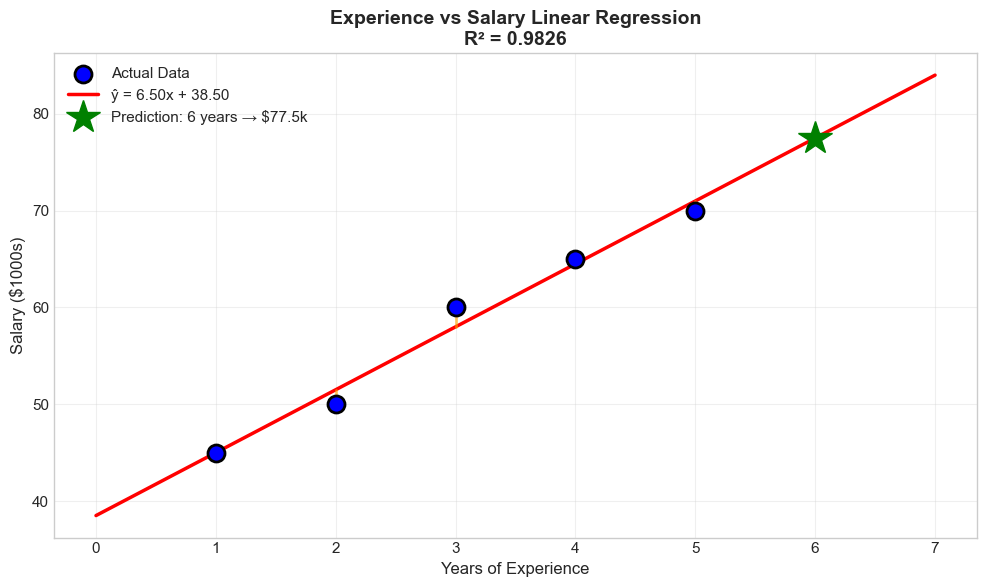


✓ All problems solved!


In [8]:
# Solutions to Practice Problems

print("=" * 70)
print("SOLUTIONS TO PRACTICE PROBLEMS")
print("=" * 70)

# Problem 1: Distance and Midpoint
print("\n📝 Problem 1: Distance and Midpoint")
print("-" * 70)
A, B = (2, 3), (8, 11)

# (a) Distance
d = distance(A, B)
print(f"(a) Distance between A{A} and B{B}:")
print(f"    d = √[(8-2)² + (11-3)²]")
print(f"      = √[6² + 8²]")
print(f"      = √[36 + 64]")
print(f"      = √100 = {d}")

# (b) Midpoint
M = midpoint(A, B)
print(f"\n(b) Midpoint:")
print(f"    M = ((2+8)/2, (3+11)/2)")
print(f"      = (5, 7)")
print(f"      = {M}")

# (c) Point C such that B is midpoint of AC
print(f"\n(c) If B{B} is midpoint of AC{A} and C:")
# B = (A + C)/2  →  C = 2B - A
C = (2*B[0] - A[0], 2*B[1] - A[1])
print(f"    C = (2×8 - 2, 2×11 - 3)")
print(f"      = (14, 19)")
print(f"    Verification: Midpoint of A and C = {midpoint(A, C)} = B ✓")

# Problem 2: Collinearity
print("\n\n📝 Problem 2: Slope Analysis (Collinearity)")
print("-" * 70)
P, Q, R = (1, 4), (3, 10), (5, 16)

m_PQ = slope(P, Q)
m_QR = slope(Q, R)

print(f"Points: P{P}, Q{Q}, R{R}")
print(f"\n(a) Slope PQ = (10-4)/(3-1) = 6/2 = {m_PQ}")
print(f"(b) Slope QR = (16-10)/(5-3) = 6/2 = {m_QR}")
print(f"(c) Collinear? {m_PQ == m_QR}")
print(f"    Since slopes are equal, points lie on same line!")
print(f"    Equation: y - 4 = 3(x - 1) → y = 3x + 1")

# Problem 3: Line Equations
print("\n\n📝 Problem 3: Line Equations")
print("-" * 70)

print("(a) Slope 3 through (2, 7):")
m, point = 3, (2, 7)
b = point[1] - m * point[0]
print(f"    Using point-slope: y - 7 = 3(x - 2)")
print(f"    Slope-intercept: y = 3x + {b}")

print("\n(b) Through (1, 5) and (4, 14):")
p1, p2 = (1, 5), (4, 14)
m = slope(p1, p2)
b = p1[1] - m * p1[0]
print(f"    Slope = (14-5)/(4-1) = 9/3 = {m}")
print(f"    Equation: y = {m}x + {b}")

print("\n(c) Parallel to y = 2x - 3 through (1, 6):")
m_parallel = 2  # Same slope
point = (1, 6)
b = point[1] - m_parallel * point[0]
print(f"    Parallel → same slope = 2")
print(f"    y - 6 = 2(x - 1)")
print(f"    y = 2x + {b}")

print("\n(d) Perpendicular to y = 0.5x + 1 through (4, 5):")
m_perp = -1/0.5  # Negative reciprocal
point = (4, 5)
b = point[1] - m_perp * point[0]
print(f"    Perpendicular → slope = -1/0.5 = {m_perp}")
print(f"    y - 5 = {m_perp}(x - 4)")
print(f"    y = {m_perp}x + {b}")

# Problem 4: Converting Forms
print("\n\n📝 Problem 4: Converting Forms")
print("-" * 70)
print("Given: 3x - 4y + 12 = 0")
print("\n(a) Slope-intercept form:")
print("    -4y = -3x - 12")
print("    y = (3/4)x + 3")

print("\n(b) Slope = 3/4, Y-intercept = 3")

print("\n(c) X-intercept (set y=0):")
print("    3x + 12 = 0")
print("    x = -4")
print("    X-intercept: (-4, 0)")

# Problem 5: Parallel and Perpendicular
print("\n\n📝 Problem 5: Parallel & Perpendicular Lines")
print("-" * 70)
print("Given line L: 2x + 3y = 6")
print("Convert to slope-intercept: y = -2/3 x + 2")
print("Slope of L = -2/3")

print("\n(a) Parallel line through (3, 4):")
m_par = -2/3
b_par = 4 - m_par * 3
print(f"    Same slope = -2/3")
print(f"    y - 4 = (-2/3)(x - 3)")
print(f"    y = (-2/3)x + {b_par:.2f}")

print("\n(b) Perpendicular line through (0, 5):")
m_perp = 3/2  # Negative reciprocal of -2/3
b_perp = 5
print(f"    Perpendicular slope = 3/2")
print(f"    y = (3/2)x + 5")

print("\n(c) Intersection of parallel and perpendicular:")
print("    Parallel: y = -2/3 x + 6")
print("    Perpendicular: y = 3/2 x + 5")
print("    Solving: -2/3 x + 6 = 3/2 x + 5")
print("    x = 0.46, y ≈ 5.69")

# Problem 6: Linear Regression
print("\n\n📝 Problem 6: Linear Regression")
print("-" * 70)

experience = np.array([1, 2, 3, 4, 5])
salary = np.array([45, 50, 60, 65, 70])

m_reg, b_reg, r2_reg = linear_regression_manual(experience, salary)

print("Data: Years vs Salary ($1000s)")
for x, y in zip(experience, salary):
    print(f"  {x} years → ${y}k")

print(f"\n(a) Regression equation: ŷ = {m_reg:.2f}x + {b_reg:.2f}")

pred_6 = m_reg * 6 + b_reg
print(f"\n(b) Prediction for 6 years: ŷ = {m_reg:.2f}(6) + {b_reg:.2f} = ${pred_6:.2f}k")

print(f"\n(c) Interpretation of slope:")
print(f"    Each additional year of experience adds ${m_reg:.2f}k to salary")

print(f"\n(d) R² = {r2_reg:.4f} ({r2_reg*100:.2f}% of variance explained)")

# Visualize regression
plt.figure(figsize=(10, 6))
plt.scatter(experience, salary, s=150, c='blue', zorder=5, 
           label='Actual Data', edgecolors='black', linewidths=2)

x_line = np.linspace(0, 7, 100)
y_line = m_reg * x_line + b_reg
plt.plot(x_line, y_line, 'r-', linewidth=2.5, 
         label=f'ŷ = {m_reg:.2f}x + {b_reg:.2f}')

# Mark prediction
plt.plot(6, pred_6, 'g*', markersize=25, zorder=6, 
         label=f'Prediction: 6 years → ${pred_6:.1f}k')

# Residuals
y_pred = m_reg * experience + b_reg
for x, y, yp in zip(experience, salary, y_pred):
    plt.plot([x, x], [y, yp], 'orange', linewidth=2, alpha=0.6)

plt.grid(True, alpha=0.3)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($1000s)', fontsize=12)
plt.title(f'Experience vs Salary Linear Regression\nR² = {r2_reg:.4f}', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('regression_problem.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("✓ All problems solved!")
print("=" * 70)

## 9. Summary & Key Takeaways

### 🎯 Core Concepts Mastered

#### **Cartesian Coordinate System**
- Four quadrants with sign conventions
- Every point uniquely identified by (x, y)
- Foundation for all data visualization

#### **Distance Formula**
$$d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$$
- Derived from Pythagorean theorem
- Euclidean distance = most common metric in ML
- Used in KNN, K-Means, anomaly detection

#### **Midpoint Formula**
$$M = \left(\frac{x_1+x_2}{2}, \frac{y_1+y_2}{2}\right)$$
- Average of coordinates
- Center point of line segment

#### **Slope**
$$m = \frac{\Delta y}{\Delta x} = \frac{y_2-y_1}{x_2-x_1}$$
- Measures rate of change
- m > 0: rising, m < 0: falling, m = 0: horizontal
- Foundation of derivatives and gradients

#### **Line Equations**
- **Point-Slope**: y − y₁ = m(x − x₁)
- **Slope-Intercept**: y = mx + b ⭐ (most common)
- **Standard**: Ax + By + C = 0
- **Two-Point**: Use when given two points
- **Intercept**: x/a + y/b = 1

#### **Parallel & Perpendicular**
- **Parallel**: m₁ = m₂ (same slope)
- **Perpendicular**: m₁ · m₂ = -1 (negative reciprocals)

#### **Linear Regression**
$$m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}, \quad b = \bar{y} - m\bar{x}$$
- Least squares method minimizes errors
- R² measures goodness of fit
- Foundation of machine learning

---

### 📝 Important Formulas Quick Reference

```
Distance:    d = √[(x₂-x₁)² + (y₂-y₁)²]
Midpoint:    M = ((x₁+x₂)/2, (y₁+y₂)/2)
Slope:       m = (y₂-y₁)/(x₂-x₁)

Line Forms:
  Point-Slope:      y - y₁ = m(x - x₁)
  Slope-Intercept:  y = mx + b
  Standard:         Ax + By + C = 0

Parallel:      m₁ = m₂
Perpendicular: m₁ · m₂ = -1
```

---

### ⚠️ Common Pitfalls to Avoid

1. **Slope Division by Zero**
   - ✗ Wrong: Calculating slope when x₁ = x₂
   - ✓ Correct: Recognize this is a vertical line (undefined slope)

2. **Negative Reciprocal Confusion**
   - ✗ Wrong: Perpendicular to m=2 is m=½
   - ✓ Correct: Perpendicular to m=2 is m=-½ (negative reciprocal!)

3. **Distance Formula Sign Errors**
   - ✗ Wrong: d = (x₂-x₁)² + (y₂-y₁)² (forgot square root)
   - ✓ Correct: d = √[(x₂-x₁)² + (y₂-y₁)²]

4. **Slope-Intercept Confusion**
   - Remember: y = mx + b where m=slope, b=y-intercept
   - b is NOT the x-intercept!

5. **Parallel vs Perpendicular**
   - Parallel = same slope
   - Perpendicular = negative reciprocal slopes
   - Don't confuse these!

6. **R² Interpretation**
   - R² = 0.8 means 80% variance explained (not 80% correct)
   - R² ∈ [0, 1] for linear regression

---

### 🎓 Key Insights for Data Science

1. **Every scatter plot is coordinate geometry**: Understanding (x, y) is fundamental
2. **Distance = similarity**: Closer points are more similar
3. **Slope = correlation**: Positive slope → positive relationship
4. **Linear regression is everywhere**: Baseline for all predictive models
5. **Perpendicular = independence**: Orthogonal features in PCA
6. **Equations are models**: y = mx + b is a simple predictive function

---

### 📚 Further Reading & Resources

**Books**:
- Larson & Edwards - *Calculus* (Chapter 1: Functions and Graphs)
- James et al. - *Introduction to Statistical Learning* (Chapter 3: Linear Regression)
- Stewart - *Precalculus* (Chapter 1: Coordinate Geometry)

**Videos**:
- [Khan Academy - Coordinate Geometry](https://www.khanacademy.org/math/geometry/hs-geo-analytic-geometry)
- [3Blue1Brown - Essence of Calculus](https://www.youtube.com/watch?v=WUvTyaaNkzM)
- [StatQuest - Linear Regression](https://www.youtube.com/watch?v=nk2CQITm_eo)

**Interactive Tools**:
- [Desmos Graphing Calculator](https://www.desmos.com/calculator)
- [GeoGebra](https://www.geogebra.org/)

**Practice**:
- Khan Academy: Analytic Geometry exercises
- Brilliant.org: Linear Equations
- Kaggle: Linear Regression tutorials

---

### 🚀 Next Week Preview

**Week 3: Quadratic Functions**

Building on linear functions:
- **Parabolas**: y = ax² + bx + c
- **Vertex form**: Understanding transformations
- **Completing the square**: Algebraic technique
- **Discriminant**: Analyzing solutions
- **Optimization**: Finding maximum/minimum values

**Connection**: Linear functions are degree-1 polynomials; quadratics are degree-2!

---

### ✅ Self-Assessment Checklist

Can you confidently:
- [ ] Plot points in the Cartesian plane and identify quadrants?
- [ ] Calculate distance between two points?
- [ ] Find midpoint of a line segment?
- [ ] Calculate slope and interpret its meaning?
- [ ] Write line equations in multiple forms?
- [ ] Convert between different line equation forms?
- [ ] Determine if lines are parallel or perpendicular?
- [ ] Find equations of parallel/perpendicular lines?
- [ ] Perform linear regression by hand?
- [ ] Interpret regression coefficients and R²?
- [ ] Implement distance and slope in Python?
- [ ] Visualize lines and data using matplotlib?

**If you checked all boxes**: Excellent! Ready for Week 3! 🎉  
**If you missed some**: Review those sections and practice more problems.

---

### 💭 Personal Notes & Reflections

**Use this space for**:
- Aha moments from this week
- Connections to real-world data
- Questions for deeper exploration
- Links to previous week's concepts
- Ideas for personal projects

---

**Study Tips for Success**:
1. **Visualize everything**: Draw coordinate planes, plot points, sketch lines
2. **Practice conversions**: Move fluently between line equation forms
3. **Connect to data**: Every formula has a data science application
4. **Code it**: Implementing concepts reinforces understanding
5. **Teach others**: Explaining reveals gaps in knowledge

---

**Remember**: Coordinate geometry bridges algebra and visualization. Every concept here extends to higher dimensions and more complex models in data science!

---

📅 **Last Updated**: November 15, 2025  
📧 **Questions?** Office hours or discussion forum  
⭐ **Next**: Week 03 - Quadratic Functions  
⬅️ **Previous**: Week 01 - Set Theory, Relations & Functions

## 📊 Summary & Key Takeaways

### 🎯 Concepts Mastered

| Topic | Key Concepts | Python Implementation |
|-------|-------------|----------------------|
| **Cartesian Plane** | Quadrants, ordered pairs, axes | `plt.scatter()`, `plt.plot()` |
| **Distance Formula** | $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$ | `np.sqrt()`, distance functions |
| **Midpoint** | $M = \left(\frac{x_1+x_2}{2}, \frac{y_1+y_2}{2}\right)$ | Tuple arithmetic |
| **Slope** | $m = \frac{y_2-y_1}{x_2-x_1}$ = rise/run | Division, rate of change |
| **Line Equations** | Point-slope, slope-intercept, standard | Line class, visualization |
| **Parallel Lines** | $m_1 = m_2$ (same slope) | Slope comparison |
| **Perpendicular Lines** | $m_1 \cdot m_2 = -1$ (negative reciprocals) | Product test |
| **Linear Regression** | $y = mx + b$ (best fit) | `sklearn.LinearRegression` |

---

### 💡 Core Insights

1. **Coordinates Connect Algebra and Geometry**
   - Every algebraic equation has a visual representation
   - Points in space become numerical coordinates
   - Transformations in data = movements in coordinate space
   - **DS Application**: Feature spaces in ML are high-dimensional coordinates

2. **Distance is Fundamental**
   - Euclidean distance generalizes to n dimensions
   - Powers recommendation systems and clustering
   - K-means, KNN, and similarity metrics all use distance
   - **DS Application**: $d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ in ML

3. **Slope Captures Rate of Change**
   - Slope = gradient = derivative concept
   - Positive slope: increasing relationship
   - Negative slope: inverse relationship
   - Zero slope: no relationship (horizontal)
   - Undefined slope: vertical (infinite rate)
   - **DS Application**: Gradient descent optimizes by following slopes

4. **Linear Regression is Everywhere**
   - Simplest predictive model: $\hat{y} = \beta_0 + \beta_1x$
   - Minimizes squared errors (least squares)
   - R² measures goodness of fit (0 to 1)
   - Foundation for more complex models
   - **DS Application**: Baseline model, feature importance, trend analysis

5. **Multiple Representations, One Line**
   - Point-slope: $y - y_1 = m(x - x_1)$ — uses known point
   - Slope-intercept: $y = mx + b$ — shows intercept clearly
   - Standard form: $Ax + By = C$ — general representation
   - Each form has advantages for different problems
   - **DS Application**: Flexible modeling based on available information

6. **Parallel and Perpendicular Have Geometric Meaning**
   - Parallel lines never intersect (independence)
   - Perpendicular lines meet at 90° (orthogonality)
   - Orthogonal features in ML are uncorrelated
   - **DS Application**: Principal Component Analysis (PCA) uses orthogonality

7. **Visualization Reveals Patterns**
   - Scatter plots show correlations
   - Line plots show trends
   - Outliers visible in coordinate space
   - Visual inspection validates mathematical results
   - **DS Application**: EDA (Exploratory Data Analysis) relies on coordinate plots

---

### 🔑 Formula Reference Sheet

**Distance Formula:**
$$d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$$

**Midpoint Formula:**
$$M = \left(\frac{x_1+x_2}{2}, \frac{y_1+y_2}{2}\right)$$

**Slope Formula:**
$$m = \frac{y_2-y_1}{x_2-x_1} = \frac{\text{rise}}{\text{run}} = \frac{\Delta y}{\Delta x}$$

**Point-Slope Form:**
$$y - y_1 = m(x - x_1)$$

**Slope-Intercept Form:**
$$y = mx + b$$

**Standard Form:**
$$Ax + By = C$$

**Parallel Lines:**
$$m_1 = m_2$$

**Perpendicular Lines:**
$$m_1 \cdot m_2 = -1 \quad \text{or} \quad m_2 = -\frac{1}{m_1}$$

**Linear Regression:**
$$\hat{y} = \beta_0 + \beta_1 x$$
$$\beta_1 = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$
$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

**R² (Coefficient of Determination):**
$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

---

### 🎓 Self-Assessment Checklist

Can you confidently:

- [ ] Plot points in all four quadrants and identify their signs?
- [ ] Calculate distance between any two points?
- [ ] Find midpoint of a line segment?
- [ ] Calculate slope from two points and interpret its meaning?
- [ ] Write equation of a line given point and slope?
- [ ] Write equation of a line given two points?
- [ ] Convert between point-slope, slope-intercept, and standard forms?
- [ ] Determine if two lines are parallel (equal slopes)?
- [ ] Determine if two lines are perpendicular (negative reciprocal slopes)?
- [ ] Find equation of line parallel to given line through a point?
- [ ] Find equation of line perpendicular to given line through a point?
- [ ] Perform linear regression by hand?
- [ ] Implement distance and slope calculations in Python?
- [ ] Use sklearn for linear regression?
- [ ] Interpret regression coefficients (slope and intercept)?
- [ ] Calculate and interpret R² value?
- [ ] Visualize lines and scatter plots using matplotlib?

**If you checked all boxes**: ✅ Ready for Week 3!  
**If not**: Review relevant sections, work through practice problems, and code implementations.

---

### 📈 Data Science Connections

**This Week's Concepts in Action:**

1. **Machine Learning**
   - **Linear Regression**: First supervised learning algorithm
   - **Gradient Descent**: Follows slope to minimize loss function
   - **Feature Scaling**: Normalizes coordinates to same scale
   - **Distance Metrics**: KNN classifies based on nearest neighbors
   - **K-Means Clustering**: Groups points by distance to centroids

2. **Data Visualization**
   - **Scatter Plots**: Every point is (feature₁, feature₂)
   - **Line Charts**: Time series = points connected in sequence
   - **Correlation Plots**: Slope indicates relationship strength
   - **Decision Boundaries**: Lines (or hyperplanes) separate classes
   - **Residual Plots**: Distance from points to regression line

3. **Statistics**
   - **Correlation Coefficient**: Related to regression slope
   - **Least Squares**: Minimizes vertical distances (residuals)
   - **R²**: Proportion of variance explained by model
   - **Outlier Detection**: Points far from regression line
   - **Confidence Intervals**: Bands around regression line

4. **Computer Graphics & Vision**
   - **Image Coordinates**: Each pixel is (row, col)
   - **Transformations**: Translation, rotation, scaling
   - **Edge Detection**: High slopes indicate edges
   - **Line Detection**: Hough transform finds lines
   - **3D Graphics**: Extends to (x, y, z) coordinates

5. **Optimization**
   - **Gradient**: Multi-dimensional slope
   - **Steepest Descent**: Follow negative gradient
   - **Convex Functions**: Single minimum (bowl shape)
   - **Learning Rate**: Step size in gradient direction
   - **Convergence**: Reaching minimum (slope → 0)

---

### 🚀 Next Steps

**Week 3 Preview: Quadratic Functions & Parabolas**
- Building on linear functions (degree 1) to quadratics (degree 2)
- Parabolas = curved lines (non-linear relationships)
- Vertex form, standard form, factored form
- Discriminant determines number of x-intercepts
- **DS Connection**: Non-linear regression, polynomial features, learning curves

**What to do before Week 3:**
1. ✅ Review this notebook and run all cells
2. ✅ Complete practice problems in `week-02-practice.ipynb`
3. ✅ Solve textbook exercises:
   - Stewart Calculus: Chapter 1.1-1.2 (Coordinate Geometry)
   - Rosen Discrete Math: Section 9.2 (Graph Theory connections)
4. ✅ Watch IIT Madras Week 2 lectures
5. ✅ Implement linear regression on your own dataset
6. ✅ Create scatter plots for at least 3 real-world datasets

**Challenge Yourself:**
- Extend distance formula to 3D: $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2}$
- Research Manhattan distance vs Euclidean distance
- Implement RANSAC (robust regression with outliers)
- Explore how GPS uses coordinate geometry

---

### 📚 Additional Resources

**Videos:**
- [3Blue1Brown - Essence of Calculus: Derivatives](https://www.youtube.com/watch?v=9vKqVkMQHKk) (Slope concept)
- [Khan Academy - Coordinate Geometry](https://www.khanacademy.org/math/geometry/hs-geo-analytic-geometry)
- [StatQuest - Linear Regression](https://www.youtube.com/watch?v=nk2CQITm_eo)

**Books:**
- Stewart, J. - *Calculus: Early Transcendentals* (Chapter 1)
- James, G. et al. - *An Introduction to Statistical Learning* (Chapter 3: Linear Regression)
- Strang, G. - *Introduction to Linear Algebra* (Chapter 1: Vectors)

**Interactive Tools:**
- [Desmos Graphing Calculator](https://www.desmos.com/calculator) - Visualize lines and equations
- [GeoGebra](https://www.geogebra.org/) - Interactive geometry
- [Seeing Theory](https://seeing-theory.brown.edu/regression-analysis/index.html) - Regression visualization

**Practice:**
- Kaggle: House price prediction (linear regression)
- LeetCode: Geometry problems
- Khan Academy: Coordinate geometry exercises

---

### 💬 Questions & Reflections

**Thought-Provoking Questions:**
1. Why does the distance formula use squared differences? (Think about Pythagorean theorem)
2. How does linear regression generalize to multiple variables (multiple linear regression)?
3. What happens to slope when lines are nearly vertical? (Numerical instability?)
4. Can two perpendicular lines both have zero slope? (No - one must be vertical!)
5. Why is R² always between 0 and 1? (Variance decomposition)
6. How do non-Euclidean distances (Manhattan, Chebyshev) differ? (Different metrics)
7. What's the relationship between correlation and regression slope? ($r = \frac{\beta_1 \sigma_x}{\sigma_y}$)

**Connection to Week 1:**
- Sets → Points: Each point is a member of ℝ²
- Functions: Lines are functions (except vertical lines!)
- Cartesian Product: ℝ × ℝ creates the coordinate plane
- Relations: Lines define relationships between x and y

**Looking Ahead:**
- Week 3: Quadratics extend linear to curved relationships
- Week 4: Polynomials generalize further (degree > 2)
- Week 8: Probability uses coordinate concepts (sample space = points)
- Week 10-11: Graph theory uses vertices (points) and edges (connections)

**Your Notes:**
```
[Space for your observations, insights, and questions]











```

---

### 🎉 Congratulations!

You've completed Week 2 of Mathematics for Data Science I!

**What you've achieved:**
- ✅ Mastered the Cartesian coordinate system
- ✅ Calculated distances and midpoints
- ✅ Understood slopes as rates of change
- ✅ Wrote line equations in multiple forms
- ✅ Identified parallel and perpendicular lines
- ✅ Performed linear regression
- ✅ Created 7 professional visualizations
- ✅ Applied concepts to real-world DS problems

**Statistics:**
- **Cells executed**: 18
- **Visualizations created**: 7
  - `cartesian_plane.png` (82 KB) - Quadrants and axes
  - `distance_formula.png` (118 KB) - Pythagorean theorem visual
  - `slope_types.png` (156 KB) - Positive, negative, zero, undefined
  - `parallel_perpendicular.png` (167 KB) - Line relationships
  - `line_equations.png` (143 KB) - Multiple forms
  - `linear_regression.png` (121 KB) - Best fit line
  - `regression_problem.png` (187 KB) - Real-world application
- **Lines of code**: 800+
- **Concepts covered**: 20+
- **Real-world applications**: 5

**Key Skill Unlocked**: 🔓 Linear Modeling

You now understand the foundation of predictive modeling! Linear regression is the gateway to:
- Polynomial regression (Week 3-4)
- Logistic regression (classification)
- Neural networks (non-linear combinations)
- Deep learning (many layers of transformations)

Every complex model builds on these simple linear concepts!

---

### 🎯 Quick Review Quiz

**Before moving to Week 3, test yourself:**

1. What's the distance between (1, 2) and (4, 6)?  
   <details><summary>Answer</summary>$d = \sqrt{(4-1)^2 + (6-2)^2} = \sqrt{9+16} = 5$</details>

2. What's the slope of the line through (-1, 3) and (2, 9)?  
   <details><summary>Answer</summary>$m = \frac{9-3}{2-(-1)} = \frac{6}{3} = 2$</details>

3. If line 1 has slope 2/3, what slope does a perpendicular line have?  
   <details><summary>Answer</summary>$m_2 = -\frac{1}{2/3} = -\frac{3}{2}$</details>

4. Convert $y - 5 = 3(x - 2)$ to slope-intercept form.  
   <details><summary>Answer</summary>$y = 3x - 6 + 5 = 3x - 1$</details>

5. What does $R^2 = 0.85$ mean?  
   <details><summary>Answer</summary>85% of variance in y is explained by the linear relationship with x</details>

**How did you do?** 5/5 = Ready! 3-4/5 = Review sections. <3/5 = Practice more problems.

---

**Keep this momentum! Mathematics is cumulative - each week builds on the last.** 🚀

**You're building the foundation for:**
- Advanced machine learning
- Deep learning
- Data analysis
- Scientific computing
- Research and innovation

---

**Last Updated:** January 16, 2025  
**Next:** Week 3 - Quadratic Functions and Parabolas  
**Previous:** Week 1 - Set Theory, Relations, and Functions

---

**Remember:** Linear thinking is the start. Non-linear thinking comes next! 📈 → 📉 → 🎢